In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [2]:
df = pd.read_csv(r'C:\Users\hp\OneDrive\Desktop\temperature.csv')

In [3]:
df.head()

,station,Date,Present_Tmax,Present_Tmin,LDAPS_RHmin,LDAPS_RHmax,LDAPS_Tmax_lapse,LDAPS_Tmin_lapse,LDAPS_WS,LDAPS_LH,...,LDAPS_PPT2,LDAPS_PPT3,LDAPS_PPT4,lat,lon,DEM,Slope,Solar radiation,Next_Tmax,Next_Tmin
0,1.0,30-06-2013,28.7,21.4,58.255688,91.116364,28.074101,23.006936,6.818887,69.451805,...,0.0,0.0,0.0,37.6046,126.991,212.3350,2.7850,5992.895996,29.1,21.2
1,2.0,30-06-2013,31.9,21.6,52.263397,90.604721,29.850689,24.035009,5.691890,51.937448,...,0.0,0.0,0.0,37.6046,127.032,44.7624,0.5141,5869.312500,30.5,22.5
2,3.0,30-06-2013,31.6,23.3,48.690479,83.973587,30.091292,24.565633,6.138224,20.573050,...,0.0,0.0,0.0,37.5776,127.058,33.3068,0.2661,5863.555664,31.1,23.9
3,4.0,30-06-2013,32.0,23.4,58.239788,96.483688,29.704629,23.326177,5.650050,65.727144,...,0.0,0.0,0.0,37.6450,127.022,45.7160,2.5348,5856.964844,31.7,24.3
4,5.0,30-06-2013,31.4,21.9,56.174095,90.155128,29.113934,23.486480,5.735004,107.965535,...,0.0,0.0,0.0,37.5507,127.135,35.0380,0.5055,5859.552246,31.2,22.5


# EDA

In [4]:
df.shape

(7752, 25)

In [5]:
df['Next_Tmax'].unique()

array([29.1, 30.5, 31.1, 31.7, 31.2, 31.5, 30.9, 31.3, 32.6, 31.4, 30.8,
       33.1, 31.8, 30.6, 32. , 24.8, 27.3, 28.1, 27.9, 28.2, 28.9, 27.6,
       27.1, 27.5, 26.8, 28.7, 27.8, 29.2, 28.8, 30. , 30.1, 29.4, 31.6,
       30.2, 30.4, 32.5, 31. , 25.2, 28.4, 28.3, 27.4, 26.2, 28. , 26.7,
       28.6, 27.7, 28.5, 30.7, 29.6, 29.9, 29.3, 32.2, 33.6, 30.3, 32.3,
       29.8, 29.7, 29.5, 29. , 23.4, 26.4, 26.6, 26.1, 25.4, 27.2, 27. ,
       26.3, 25.5, 25.6, 25.9, 23. , 26.5, 26. , 25.7, 22.4, 25.8, 25.1,
       24.9, 24.3, 24.5, 25.3, 21.8, 24.7, 25. , 24.6, 23.6, 24.1, 23.2,
       23.7, 24.2, 23.8, 23.9, 31.9, 23.1, 33. , 32.7, 26.9, 32.1, 33.3,
       32.4, 33.4, 33.5, 34.8, 34. , 34.3, 34.5,  nan, 32.8, 33.7, 33.2,
       32.9, 34.1, 34.9, 35.3, 34.6, 35. , 33.9, 34.7, 36.6, 34.4, 35.8,
       35.2, 33.8, 35.6, 35.1, 34.2, 36. , 35.5, 35.4, 21.6, 23.5, 24.4,
       24. , 35.9, 36.1, 22.5, 22.8, 36.2, 21.1, 23.3, 22. , 22.7, 20.9,
       22.2, 22.1, 37. , 36.9, 22.9, 35.7, 37.1, 22

In [6]:
df['Next_Tmin'].unique()

array([21.2, 22.5, 23.9, 24.3, 24. , 23.4, 22.9, 21.6, 21. , 24.5, 22.2,
       22.8, 20.9, 21.1, 23. , 23.7, 23.2, 24.2, 18.7, 21.5, 21.8, 22.3,
       21.3, 20.7, 19.8, 20.8, 21.7, 22.1, 20.5, 21.9, 17.8, 20.1, 20.3,
       19.4, 19.1, 18.9, 20. , 19.7, 19.5, 20.6, 23.1, 23.3, 22.7, 22.6,
       22.4, 22. , 23.5, 23.8, 21.4, 19.3, 20.4, 19.9, 20.2, 24.1, 23.6,
       24.4, 24.8, 25.1, 24.6, 24.7, 25. , 24.9, 25.3, 26. , 26.1, 25.5,
       25.8, 25.4, 25.6, 25.7, 25.2, 25.9, 26.3, 26.2, 26.4, 26.5, 26.9,
        nan, 26.8, 26.6, 27. , 27.1, 26.7, 27.5, 27.2, 27.4, 27.7, 28.3,
       27.6, 28. , 27.3, 19.6, 19.2, 18.6, 18.5, 18.2, 18.4, 18.8, 17.9,
       17.5, 16.5, 18. , 19. , 16.7, 18.1, 18.3, 28.1, 28.4, 29.4, 29.1,
       28.5, 28.8, 29.8, 29.5, 28.6, 17.1, 16.8, 17.6, 17.4, 15.8, 16.9,
       17.7, 17.2, 15.5, 16.6, 16.4, 16.3, 17. , 14.7, 15.9, 16. , 17.3,
       15.4, 15.3, 13.8, 15.6, 15.1, 27.9, 28.7, 27.8, 28.2, 13.3, 14.1,
       15. , 11.3, 13.4, 15.7, 14.9, 16.2, 14.4, 16

In [7]:
# regression problem

In [8]:
df.isnull().sum()

station              2
Date                 2
Present_Tmax        70
Present_Tmin        70
LDAPS_RHmin         75
LDAPS_RHmax         75
LDAPS_Tmax_lapse    75
LDAPS_Tmin_lapse    75
LDAPS_WS            75
LDAPS_LH            75
LDAPS_CC1           75
LDAPS_CC2           75
LDAPS_CC3           75
LDAPS_CC4           75
LDAPS_PPT1          75
LDAPS_PPT2          75
LDAPS_PPT3          75
LDAPS_PPT4          75
lat                  0
lon                  0
DEM                  0
Slope                0
Solar radiation      0
Next_Tmax           27
Next_Tmin           27
dtype: int64

In [9]:
df['station'].fillna(df['station'].mean(),inplace=True)

In [10]:
df['Date'].fillna(df['Date'].mode()[0],inplace=True)

In [11]:
df['Present_Tmax'].fillna(df['Present_Tmax'].mean(),inplace=True)

In [12]:
df['Present_Tmin'].fillna(df['Present_Tmin'].mean(),inplace=True)

In [13]:
df['LDAPS_RHmin'].fillna(df['LDAPS_RHmin'].median(),inplace=True)

In [14]:
df['LDAPS_RHmax'].fillna(df['LDAPS_RHmax'].median(),inplace=True)

In [15]:
df['LDAPS_Tmax_lapse'].fillna(df['LDAPS_Tmax_lapse'].median(),inplace=True)

In [16]:
df['LDAPS_Tmin_lapse'].fillna(df['LDAPS_Tmin_lapse'].median(),inplace=True)

In [17]:
df['LDAPS_WS'].fillna(df['LDAPS_WS'].median(),inplace=True)

In [18]:
df['LDAPS_LH'].fillna(df['LDAPS_LH'].median(),inplace=True)

In [19]:
df['LDAPS_CC1'].fillna(df['LDAPS_CC1'].median(),inplace=True)

In [20]:
df['LDAPS_CC2'].fillna(df['LDAPS_CC2'].median(),inplace=True)

In [21]:
df['LDAPS_CC3'].fillna(df['LDAPS_CC3'].median(),inplace=True)

In [22]:
df['LDAPS_CC4'].fillna(df['LDAPS_CC4'].median(),inplace=True)

In [23]:
df['LDAPS_PPT1'].fillna(df['LDAPS_PPT1'].median(),inplace=True)

In [24]:
df['LDAPS_PPT2'].fillna(df['LDAPS_PPT2'].median(),inplace=True)

In [25]:
df['LDAPS_PPT3'].fillna(df['LDAPS_PPT3'].median(),inplace=True)

In [26]:
df['LDAPS_PPT4'].fillna(df['LDAPS_PPT4'].median(),inplace=True)

In [27]:
df['Next_Tmax'].fillna(df['Next_Tmax'].mean(),inplace=True)

In [28]:
df['Next_Tmin'].fillna(df['Next_Tmin'].mean(),inplace=True)

In [29]:
df.isnull().sum()

station             0
Date                0
Present_Tmax        0
Present_Tmin        0
LDAPS_RHmin         0
LDAPS_RHmax         0
LDAPS_Tmax_lapse    0
LDAPS_Tmin_lapse    0
LDAPS_WS            0
LDAPS_LH            0
LDAPS_CC1           0
LDAPS_CC2           0
LDAPS_CC3           0
LDAPS_CC4           0
LDAPS_PPT1          0
LDAPS_PPT2          0
LDAPS_PPT3          0
LDAPS_PPT4          0
lat                 0
lon                 0
DEM                 0
Slope               0
Solar radiation     0
Next_Tmax           0
Next_Tmin           0
dtype: int64

In [30]:
# no null values

In [31]:
df.describe()

,station,Present_Tmax,Present_Tmin,LDAPS_RHmin,LDAPS_RHmax,LDAPS_Tmax_lapse,LDAPS_Tmin_lapse,LDAPS_WS,LDAPS_LH,LDAPS_CC1,...,LDAPS_PPT2,LDAPS_PPT3,LDAPS_PPT4,lat,lon,DEM,Slope,Solar radiation,Next_Tmax,Next_Tmin
count,7752.000000,7752.000000,7752.000000,7752.000000,7752.000000,7752.000000,7752.000000,7752.000000,7752.000000,7752.000000,...,7752.000000,7752.000000,7752.000000,7752.000000,7752.000000,7752.000000,7752.000000,7752.000000,7752.000000,7752.000000
mean,13.000000,29.768211,23.225059,56.742728,88.388529,29.614317,23.514984,7.092549,62.450457,0.368260,...,0.480310,0.275508,0.266801,37.544722,126.991397,61.867972,1.257048,5341.502803,30.274887,22.932220
std,7.210637,2.956557,2.403036,14.597945,7.158471,2.932911,2.334099,2.173913,33.571540,0.261236,...,1.754900,1.156495,1.200654,0.050352,0.079435,54.279780,1.370444,429.158867,3.122557,2.483276
min,1.000000,20.000000,11.300000,19.794666,58.936283,17.624954,14.272646,2.882580,-13.603212,0.000000,...,0.000000,0.000000,0.000000,37.456200,126.826000,12.370000,0.098475,4329.520508,17.400000,11.300000
25%,7.000000,27.800000,21.700000,46.046162,84.316923,27.693091,22.114651,5.686487,37.532764,0.148321,...,0.000000,0.000000,0.000000,37.510200,126.937000,28.700000,0.271300,4999.018555,28.200000,21.400000
50%,13.000000,29.900000,23.400000,55.039024,89.793480,29.703426,23.760199,6.547470,56.865482,0.315697,...,0.000000,0.000000,0.000000,37.550700,126.995000,45.716000,0.618000,5436.345215,30.500000,23.100000
75%,19.000000,32.000000,24.900000,67.038254,93.704500,31.683819,25.134000,8.007471,83.904586,0.571696,...,0.016748,0.007231,0.000000,37.577600,127.042000,59.832400,1.767800,5728.316406,32.600000,24.600000
max,25.000000,37.600000,29.900000,98.524734,100.000153,38.542255,29.619342,21.857621,213.414006,0.967277,...,21.621661,15.841235,16.655469,37.645000,127.135000,212.335000,5.178230,5992.895996,38.900000,29.800000


In [32]:
df.dtypes

station             float64
Date                 object
Present_Tmax        float64
Present_Tmin        float64
LDAPS_RHmin         float64
LDAPS_RHmax         float64
LDAPS_Tmax_lapse    float64
LDAPS_Tmin_lapse    float64
LDAPS_WS            float64
LDAPS_LH            float64
LDAPS_CC1           float64
LDAPS_CC2           float64
LDAPS_CC3           float64
LDAPS_CC4           float64
LDAPS_PPT1          float64
LDAPS_PPT2          float64
LDAPS_PPT3          float64
LDAPS_PPT4          float64
lat                 float64
lon                 float64
DEM                 float64
Slope               float64
Solar radiation     float64
Next_Tmax           float64
Next_Tmin           float64
dtype: object

In [33]:
#data visulazation

<AxesSubplot:xlabel='Date', ylabel='count'>

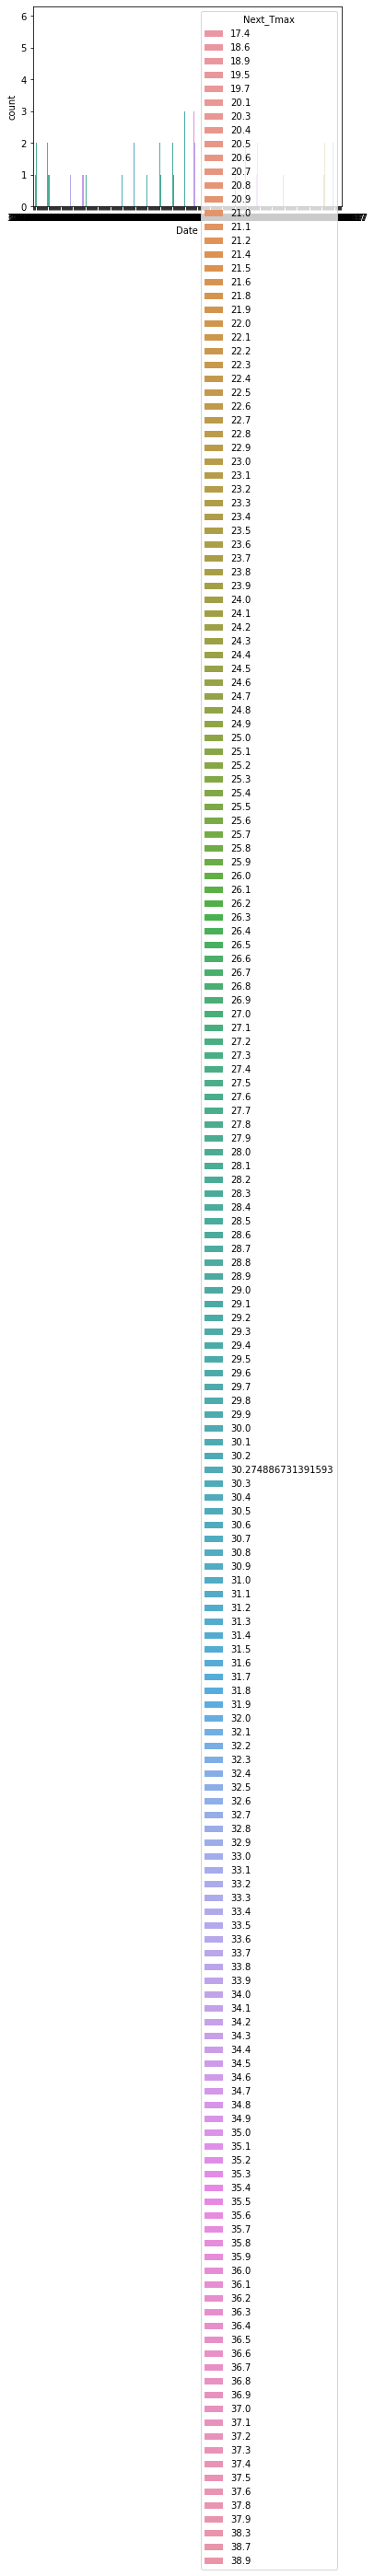

In [34]:
sns.countplot(df['Date'],hue='Next_Tmax',data=df)

<AxesSubplot:xlabel='Date', ylabel='count'>

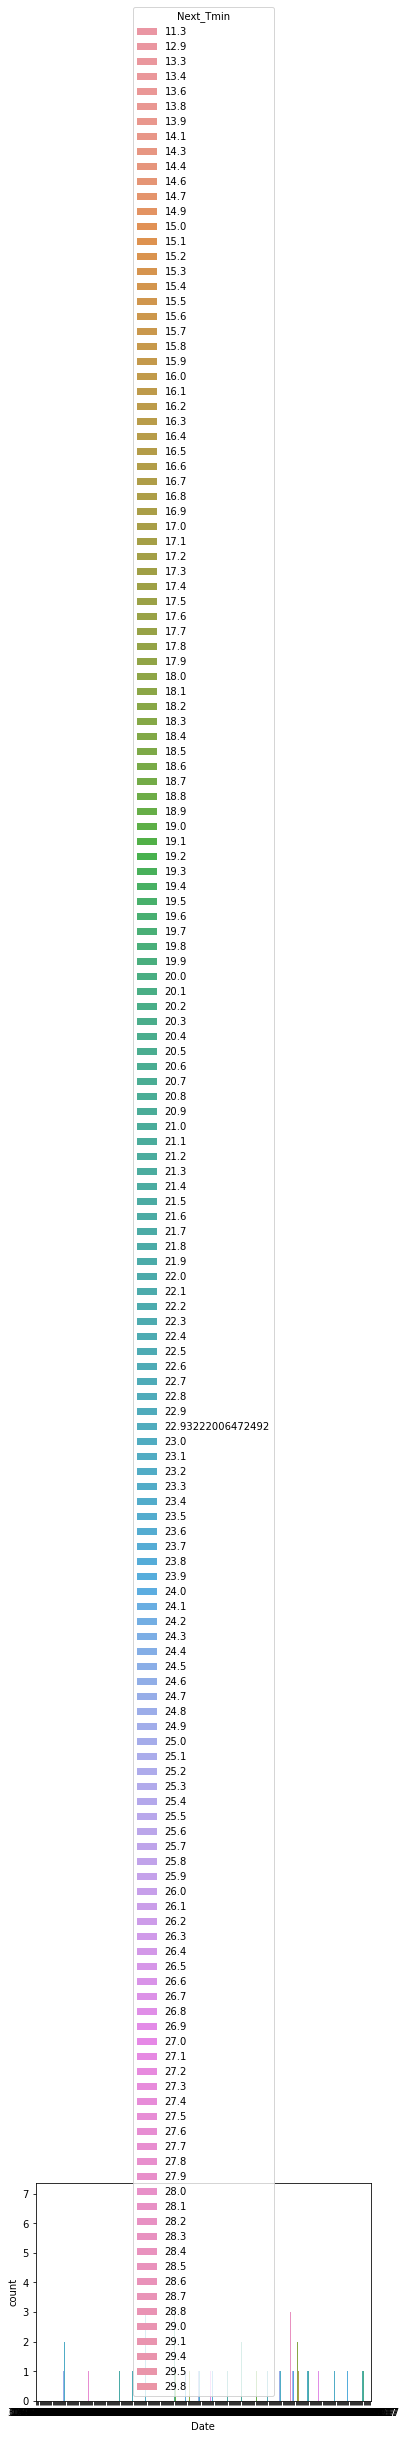

In [35]:
sns.countplot(df['Date'],hue='Next_Tmin',data=df)

<AxesSubplot:xlabel='Present_Tmax', ylabel='Present_Tmin'>

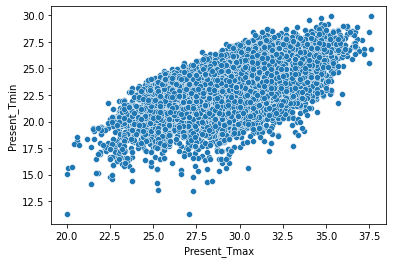

In [36]:
sns.scatterplot(data=df,x='Present_Tmax',y='Present_Tmin')

<AxesSubplot:xlabel='LDAPS_RHmax', ylabel='LDAPS_RHmin'>

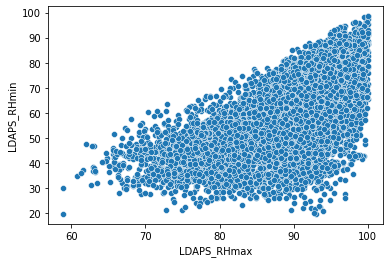

In [37]:
sns.scatterplot(data=df,x='LDAPS_RHmax',y='LDAPS_RHmin')

<AxesSubplot:xlabel='LDAPS_Tmax_lapse', ylabel='LDAPS_Tmin_lapse'>

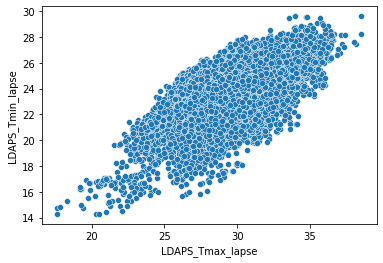

In [38]:
sns.scatterplot(data=df,x='LDAPS_Tmax_lapse',y='LDAPS_Tmin_lapse')

<AxesSubplot:xlabel='LDAPS_WS', ylabel='LDAPS_LH'>

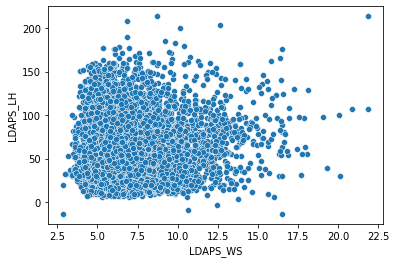

In [39]:
sns.scatterplot(data=df,x='LDAPS_WS',y='LDAPS_LH')

<AxesSubplot:xlabel='LDAPS_CC1', ylabel='LDAPS_CC2'>

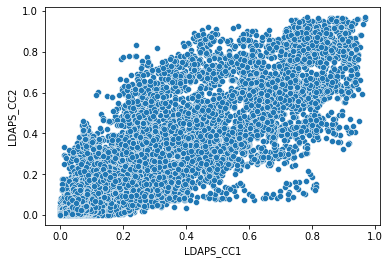

In [40]:
sns.scatterplot(data=df,x='LDAPS_CC1',y='LDAPS_CC2')

<AxesSubplot:xlabel='LDAPS_CC3', ylabel='LDAPS_CC4'>

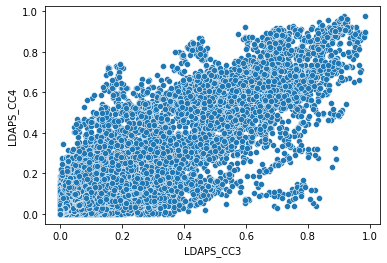

In [41]:
sns.scatterplot(data=df,x='LDAPS_CC3',y='LDAPS_CC4')

<AxesSubplot:xlabel='LDAPS_PPT1', ylabel='LDAPS_PPT2'>

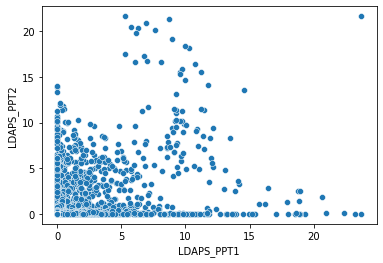

In [42]:
sns.scatterplot(data=df,x='LDAPS_PPT1',y='LDAPS_PPT2')

<AxesSubplot:xlabel='LDAPS_PPT3', ylabel='LDAPS_PPT4'>

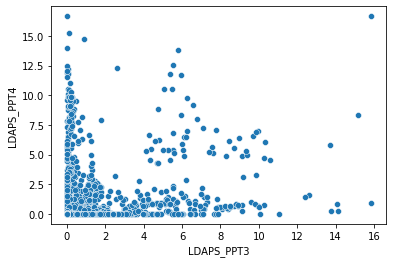

In [43]:
sns.scatterplot(data=df,x='LDAPS_PPT3',y='LDAPS_PPT4')

<AxesSubplot:xlabel='Next_Tmax', ylabel='Next_Tmin'>

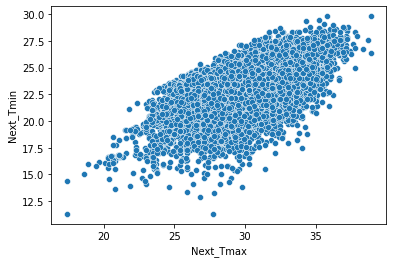

In [44]:
sns.scatterplot(data=df,x='Next_Tmax',y='Next_Tmin')

In [45]:
#data column is object convert numerical use encoding

In [46]:
from sklearn import preprocessing

In [47]:
le = preprocessing.LabelEncoder()

In [48]:
df['Date']=le.fit_transform(df['Date'])

In [49]:
df.dtypes

station             float64
Date                  int32
Present_Tmax        float64
Present_Tmin        float64
LDAPS_RHmin         float64
LDAPS_RHmax         float64
LDAPS_Tmax_lapse    float64
LDAPS_Tmin_lapse    float64
LDAPS_WS            float64
LDAPS_LH            float64
LDAPS_CC1           float64
LDAPS_CC2           float64
LDAPS_CC3           float64
LDAPS_CC4           float64
LDAPS_PPT1          float64
LDAPS_PPT2          float64
LDAPS_PPT3          float64
LDAPS_PPT4          float64
lat                 float64
lon                 float64
DEM                 float64
Slope               float64
Solar radiation     float64
Next_Tmax           float64
Next_Tmin           float64
dtype: object

In [50]:
corr = df.corr()
corr

,station,Date,Present_Tmax,Present_Tmin,LDAPS_RHmin,LDAPS_RHmax,LDAPS_Tmax_lapse,LDAPS_Tmin_lapse,LDAPS_WS,LDAPS_LH,...,LDAPS_PPT2,LDAPS_PPT3,LDAPS_PPT4,lat,lon,DEM,Slope,Solar radiation,Next_Tmax,Next_Tmin
station,1.000000e+00,-5.771714e-18,0.112655,0.131646,-0.066729,-0.166953,0.069107,0.104753,0.005275,-0.133339,...,-0.008247,-0.012458,-0.010399,-0.237502,-0.118704,-0.255830,-0.090061,-0.019001,0.107983,0.128293
Date,-5.771714e-18,1.000000e+00,-0.135988,-0.102590,-0.070060,-0.019250,-0.155566,-0.171531,-0.048085,-0.018960,...,-0.014392,-0.000777,-0.039520,-0.000052,0.000061,-0.000414,-0.000449,-0.432937,-0.115928,-0.126034
Present_Tmax,1.126554e-01,-1.359879e-01,1.000000,0.618760,-0.205395,-0.300322,0.570345,0.624216,-0.123582,0.134251,...,-0.101377,-0.122044,-0.101178,-0.052615,0.009020,-0.187121,-0.105809,-0.025439,0.610348,0.622741
Present_Tmin,1.316462e-01,-1.025896e-01,0.618760,1.000000,0.121718,-0.012754,0.464518,0.764227,-0.037708,-0.011276,...,0.064829,-0.049005,-0.065647,-0.078475,-0.043461,-0.250275,-0.146339,0.053578,0.471806,0.796670
LDAPS_RHmin,-6.672872e-02,-7.006035e-02,-0.205395,0.121718,1.000000,0.578770,-0.564575,0.089346,0.294537,-0.070654,...,0.391110,0.240831,0.168797,0.087093,-0.076232,0.102108,0.123736,0.244643,-0.439263,0.093980
LDAPS_RHmax,-1.669531e-01,-1.925001e-02,-0.300322,-0.012754,0.578770,1.000000,-0.373274,-0.113914,0.134786,0.238183,...,0.228398,0.134087,0.117376,0.195761,0.025662,0.177134,0.219557,0.148259,-0.281341,-0.070246
LDAPS_Tmax_lapse,6.910687e-02,-1.555658e-01,0.570345,0.464518,-0.564575,-0.373274,1.000000,0.654013,-0.311973,0.047954,...,-0.242113,-0.188133,-0.160300,-0.042093,0.090665,-0.178895,-0.162332,0.047820,0.827548,0.587135
LDAPS_Tmin_lapse,1.047525e-01,-1.715308e-01,0.624216,0.764227,0.089346,-0.113914,0.654013,1.000000,-0.130245,-0.134906,...,0.000588,-0.088791,-0.094855,-0.096252,-0.026700,-0.195445,-0.185839,0.159445,0.588206,0.881059
LDAPS_WS,5.275379e-03,-4.808474e-02,-0.123582,-0.037708,0.294537,0.134786,-0.311973,-0.130245,1.000000,0.007115,...,0.192427,0.162173,0.144550,0.036646,-0.059448,0.190995,0.171577,0.122966,-0.345619,-0.098767
LDAPS_LH,-1.333385e-01,-1.896015e-02,0.134251,-0.011276,-0.070654,0.238183,0.047954,-0.134906,0.007115,1.000000,...,-0.077061,0.016483,0.020332,0.133203,0.025819,0.055126,0.086770,-0.046553,0.155608,-0.056906


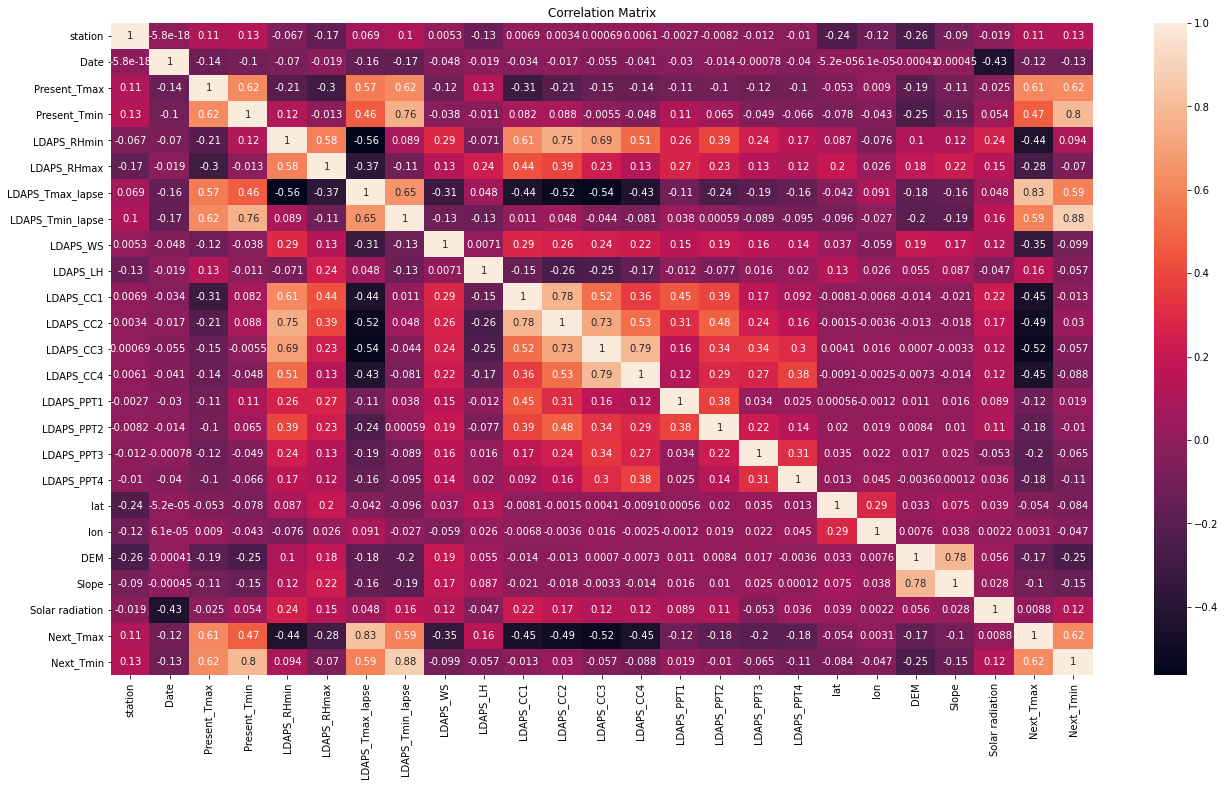

In [51]:
plt.figure(figsize=[22,12])
sns.heatmap(corr,annot=True)
plt.title('Correlation Matrix')
plt.show()

In [52]:
# boxplot

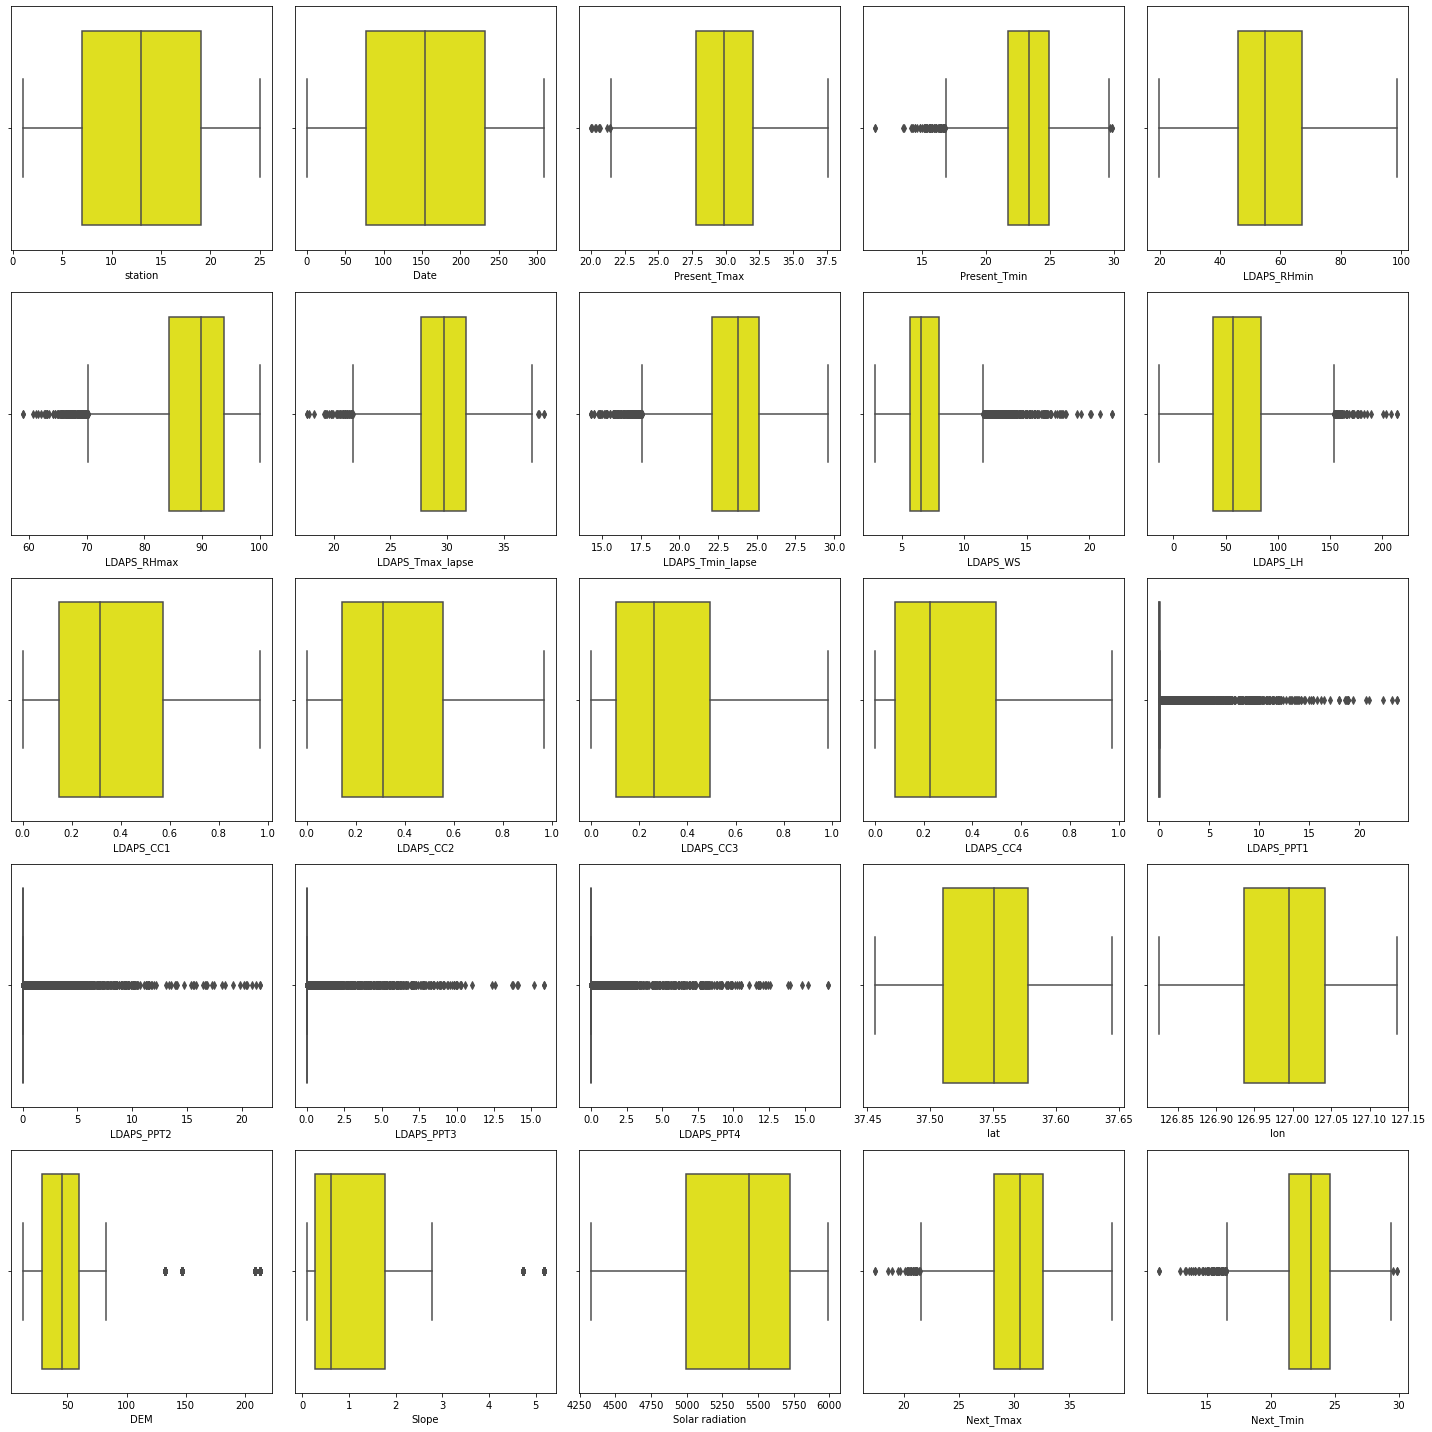

In [53]:
collist=df.columns.values
ncol=5
nrows=5
plt.figure(figsize=(20,20))
for i in range(0,len(collist)):
    plt.subplot(nrows,ncol,i+1)
    sns.boxplot(df[collist[i]],color='yellow')
    plt.tight_layout()

In [54]:
dfCountCols = df[['Present_Tmax','Present_Tmin','LDAPS_RHmax','LDAPS_Tmax_lapse','LDAPS_Tmin_lapse','LDAPS_WS','LDAPS_LH','LDAPS_PPT1','LDAPS_PPT2','LDAPS_PPT3','LDAPS_PPT4','DEM','Slope','Solar radiation']]

In [55]:
from scipy.stats import zscore
z = np.abs(zscore(dfCountCols))
df_new=df[(z<3).all(axis=1)]

In [56]:
print("shape before and after")
print("shape before".ljust(20),":", df.shape)
print("shape after".ljust(20),":", df_new.shape)
print("Percentage Loss".ljust(20),":", (df.shape[0]-df_new.shape[0])/df.shape[0])


shape before and after
shape before         : (7752, 25)
shape after          : (6907, 25)
Percentage Loss      : 0.10900412796697627


In [57]:
df.skew()

station             0.000000
Date                0.000009
Present_Tmax       -0.264137
Present_Tmin       -0.367538
LDAPS_RHmin         0.303565
LDAPS_RHmax        -0.860210
LDAPS_Tmax_lapse   -0.228767
LDAPS_Tmin_lapse   -0.584737
LDAPS_WS            1.584975
LDAPS_LH            0.678315
LDAPS_CC1           0.465003
LDAPS_CC2           0.477041
LDAPS_CC3           0.646670
LDAPS_CC4           0.673700
LDAPS_PPT1          5.395178
LDAPS_PPT2          5.776835
LDAPS_PPT3          6.458608
LDAPS_PPT4          6.826930
lat                 0.087062
lon                -0.285213
DEM                 1.723257
Slope               1.563020
Solar radiation    -0.511210
Next_Tmax          -0.340200
Next_Tmin          -0.404447
dtype: float64

In [58]:
features = ['Present_Tmax','Present_Tmin','LDAPS_RHmax','LDAPS_Tmax_lapse','LDAPS_Tmin_lapse','LDAPS_WS','LDAPS_LH','LDAPS_PPT1','LDAPS_PPT2','LDAPS_PPT3','LDAPS_PPT4','DEM','Slope','Solar radiation']

In [59]:
from sklearn.preprocessing import power_transform
df[features]=power_transform(df[features],method="yeo-johnson")


In [60]:
x = df.drop(columns=['Next_Tmax'],axis=1)
y = df['Next_Tmax']

In [61]:
x = df.drop(columns=['Next_Tmin'],axis=1)
y = df['Next_Tmin']

In [62]:
dummy=pd.DataFrame(x)
dummy.skew()

station             0.000000
Date                0.000009
Present_Tmax       -0.035006
Present_Tmin       -0.012048
LDAPS_RHmin         0.303565
LDAPS_RHmax        -0.116481
LDAPS_Tmax_lapse   -0.009402
LDAPS_Tmin_lapse   -0.018120
LDAPS_WS            0.002449
LDAPS_LH            0.058865
LDAPS_CC1           0.465003
LDAPS_CC2           0.477041
LDAPS_CC3           0.646670
LDAPS_CC4           0.673700
LDAPS_PPT1          1.463941
LDAPS_PPT2          1.646417
LDAPS_PPT3          1.824919
LDAPS_PPT4          2.059400
lat                 0.087062
lon                -0.285213
DEM                 0.039456
Slope               0.233968
Solar radiation    -0.176636
Next_Tmax          -0.340200
dtype: float64

In [63]:
#remove skewness

In [64]:
# so data cleaning proceed ml 

In [65]:
x = df.drop(columns=['Next_Tmax'],axis=1)
y = df['Next_Tmax']

In [66]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsRegressor
from sklearn.svm import SVR
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error,mean_absolute_error
from sklearn.model_selection import cross_val_score

In [67]:
scaler = StandardScaler()
x_scaler = scaler.fit_transform(x)

In [68]:
x_train,x_test,y_train,y_test = train_test_split(x_scaler,y,test_size = 0.30,random_state=83)

In [69]:
kn=KNeighborsRegressor()
sv=SVR()

In [70]:
kn.fit(x_train,y_train)
y_pred = kn.predict(x_test)
print('r2 score',r2_score(y_test,y_pred))
print(mean_absolute_error(y_test,y_pred))
print(mean_squared_error(y_test,y_pred))
print(cross_val_score(kn,x,y,cv=5).mean())

r2 score 0.8742607758781296
0.8427448318849531
1.2439486974964422
0.21868080372557133


In [71]:
x = df.drop(columns=['Next_Tmin'],axis=1)
y = df['Next_Tmin']

In [72]:
sv.fit(x_train,y_train)
y_pred = sv.predict(x_test)
print('r2 score',r2_score(y_test,y_pred))
print(mean_absolute_error(y_test,y_pred))
print(mean_squared_error(y_test,y_pred))
print(cross_val_score(sv,x,y,cv=5).mean())

r2 score 0.8820356295707487
0.7897179136620719
1.1670314173740113
0.359627002791326


In [73]:
# least model select is svr

In [74]:
# hyper parameter tuning

In [75]:
from sklearn.model_selection import GridSearchCV

In [76]:
param_grid = {'degree':[2,4,6,8,10,12,14,16,18,20],
              'gamma':['scale','auto'],
              'max_iter':[1,3,5,9,11,13,15,17,19,21]}

gridsearch = GridSearchCV(estimator=sv,param_grid=param_grid,cv=5)
gridsearch.fit(x_train,y_train)

GridSearchCV(cv=5, estimator=SVR(),
             param_grid={'degree': [2, 4, 6, 8, 10, 12, 14, 16, 18, 20],
                         'gamma': ['scale', 'auto'],
                         'max_iter': [1, 3, 5, 9, 11, 13, 15, 17, 19, 21]})

In [77]:
gridsearch.best_params_

{'degree': 2, 'gamma': 'scale', 'max_iter': 21}

In [80]:
mod=SVR(degree=2,gamma='scale',max_iter=21)
mod.fit(x_train,y_train)
y_pred = mod.predict(x_test)
r2=r2_score(y_test,y_pred)
print(r2*100)

46.351106155949175


In [81]:
import joblib
joblib.dump(mod,'temperature.pkl')

['temperature.pkl']